### Day 2 - Customer's Profile [Jonathan] 

#### SUMMARY
##### What’s the primary profile of Vanguard's clients?
- The primary clients using this online process have an average age of 47 years old with a median of 48 years old. The age distribution weights most between the ages of 40-64, 47% of participants fall in this range. 
- The average account balance is 149,521 and the median balance is 65,736. 52% clients have a balance between 0-100k and 70% between 0-200k.
- In our dataset, the distribution of the variation is: 55.4% in the control group and 44.6% in the test group.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association
import statsmodels.api as sm
from scipy.stats import skew, kurtosis

%matplotlib inline

# Using the "Reds" palette
sns.set_palette("Reds")

In [259]:
df = pd.read_csv("../data/clean/df_cleaned.csv")

In [261]:
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321182,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,step_2,2017-03-30 23:59:15
321183,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,step_1,2017-03-30 23:58:51
321184,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:58:40
321185,7468138,18.0,222.0,61.0,F,3.0,209278.15,0.0,3.0,Test,317123960_46820919455,769876461_30381166055_830233,start,2017-03-30 23:55:11


In [128]:
unique_client_df = df.drop_duplicates(subset='client_id', keep='first').copy()

In [132]:
unique_client_df.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
11,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control,336210275_56978226960,724930510_65323235593_692754,confirm,2017-05-21 11:07:16
17,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test,245908175_84333642537,898099666_87299892721_263146,step_3,2017-04-06 09:29:59
22,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test,391202328_71710993352,71954691_44810191073_495385,start,2017-04-06 19:03:46
23,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control,432077852_35036160885,942996157_39527225999_589383,start,2017-06-14 14:22:31


In [134]:
unique_client_df.select_dtypes("number").columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

In [136]:
unique_client_df.select_dtypes("number").nunique().sort_values(ascending=False)

client_id           50485
bal                 50309
clnt_tenure_mnth      469
clnt_age              158
clnt_tenure_yr         53
num_accts               7
calls_6_mnth            7
logons_6_mnth           7
dtype: int64

In [78]:
df.select_dtypes("object").columns

Index(['gendr', 'Variation', 'visitor_id', 'visit_id', 'process_step',
       'date_time'],
      dtype='object')

In [232]:
# Separating numerical and categorical columns
numerical_cols = unique_client_df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = unique_client_df.select_dtypes(include=['object']).columns.tolist()

In [234]:
# Summary of numerical columns
numerical_summary = unique_client_df[numerical_cols].describe()
numerical_summary

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,5.048500e+04,50485.000000,50485.000000,50485.000000,50485.000000,5.048500e+04,50485.000000,50485.000000
mean,5.006173e+06,12.031891,150.417391,47.320362,2.254590,1.495216e+05,3.093255,6.131841
std,2.877501e+06,6.860447,81.946832,15.518599,0.533683,3.020441e+05,2.187994,2.175426
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.515665e+06,6.000000,82.000000,33.500000,2.000000,3.988048e+04,1.000000,4.000000
50%,5.025043e+06,11.000000,136.000000,48.000000,2.000000,6.573680e+04,3.000000,6.000000
75%,7.477929e+06,16.000000,192.000000,59.500000,2.000000,1.399620e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


In [140]:
# Frequency tables for categorical variables
frequency_table = {col: unique_client_df[col].value_counts() for col in ['gendr', 'Variation', 'process_step']}
frequency_table

{'gendr': gendr
 U    17280
 M    16947
 F    16258
 Name: count, dtype: int64,
 'Variation': Variation
 Test       26959
 Control    23526
 Name: count, dtype: int64,
 'process_step': process_step
 confirm    28129
 start      12953
 step_1      4206
 step_3      3148
 step_2      2049
 Name: count, dtype: int64}

In [ ]:
# Measures of Centrality (age)

In [142]:
mean_age = unique_client_df['clnt_age'].mean()
median_age = unique_client_df['clnt_age'].median()
mode_age = unique_client_df['clnt_age'].mode()[0]

mean_age, median_age, mode_age

(47.32036248390611, 48.0, 58.5)

In [ ]:
# Measures of Dispersion (age)

In [144]:
variance_age = unique_client_df['clnt_age'].var()
std_dev_age = unique_client_df['clnt_age'].std()
min_age = unique_client_df['clnt_age'].min()
max_age = unique_client_df['clnt_age'].max()
range_age = max_age - min_age
quantiles_age = unique_client_df['clnt_age'].quantile([0.25, 0.5, 0.75])

variance_age, std_dev_age, min_age, max_age, range_age, quantiles_age

(240.8269128311251,
 15.51859893260745,
 17.0,
 96.0,
 79.0,
 0.25    33.5
 0.50    48.0
 0.75    59.5
 Name: clnt_age, dtype: float64)

##### Sumary statistics for Client Age
- The average age of the client base is 47 years old with a median of 48 years old, indicating most Vanguard clients are middle aged.
- Minimum age is 17 years old and the maximum age is 96 years old with a range of 79 years.

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_13999/3113764585.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_bins', data=unique_client_df, order=labels, palette='Reds')


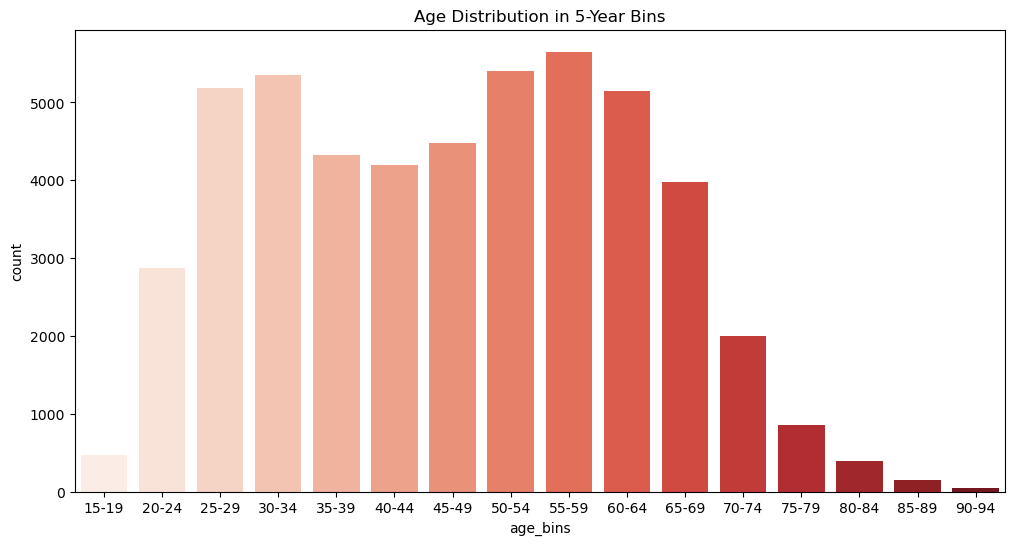

In [146]:
# Histogram (age)
# Create bins for age in 5-year intervals and categorize
bins = range(15, 100, 5)  # Age bins from 15 to 95 in steps of 5
labels = [f"{i}-{i+4}" for i in bins[:-1]]  # Labels like '15-19', '20-24', etc.
unique_client_df['age_bins'] = pd.cut(unique_client_df['clnt_age'], bins=bins, labels=labels, right=False)

# Plotting the age distribution with bins
plt.figure(figsize=(12, 6))
sns.countplot(x='age_bins', data=unique_client_df, order=labels, palette='Reds')
plt.title('Age Distribution in 5-Year Bins')
plt.show()


In [152]:
# Count the number of clients in each age bin
age_bin_counts = unique_client_df['age_bins'].value_counts(sort=False)  # `sort=False` keeps the bin order

# Calculate percentages
age_bin_percentages = (age_bin_counts / len(unique_client_df)) * 100

# Combine counts and percentages into a DataFrame
age_distribution = pd.DataFrame({
    'Age Bin': labels,
    'Count': age_bin_counts.values,
    'Percentage': age_bin_percentages.values
})

# Display the DataFrame
age_distribution

,Age Bin,Count,Percentage
0,15-19,472,0.934931
1,20-24,2871,5.686838
2,25-29,5187,10.274339
3,30-34,5345,10.587303
4,35-39,4328,8.572843
5,40-44,4190,8.299495
6,45-49,4476,8.866000
7,50-54,5406,10.708131
8,55-59,5652,11.195405
9,60-64,5151,10.203031


/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_13999/2529765054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


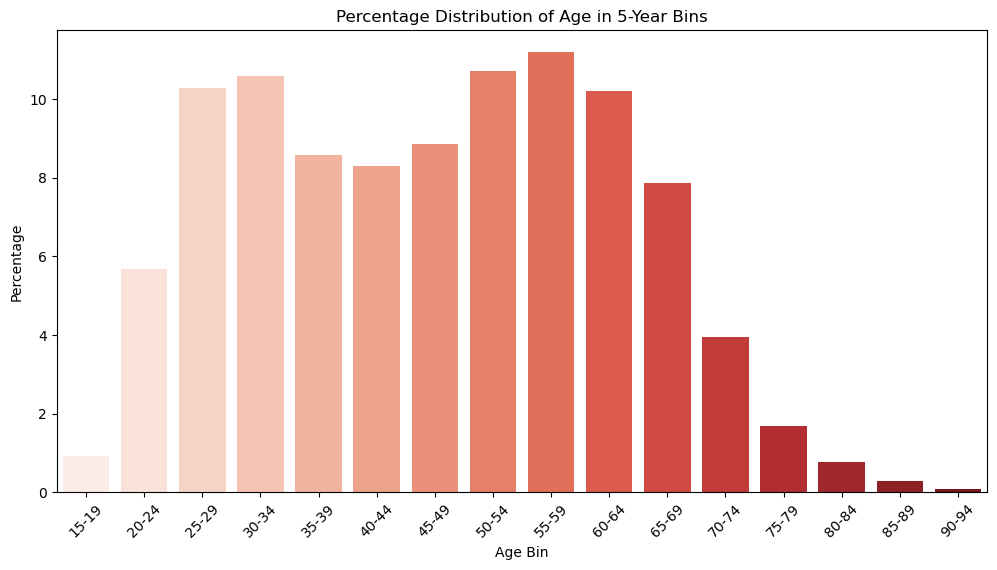

In [154]:
# Bar plot for age bin percentages
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Age Bin', 
    y='Percentage', 
    data=age_distribution, 
    palette='Reds'
)
plt.title('Percentage Distribution of Age in 5-Year Bins')
plt.xlabel('Age Bin')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.savefig("../figures/percentage_age_bins.jpeg", format="jpeg", dpi=300)
plt.show()

#### Bar Plot for 'clnt_age'
- Over 30% of clisnts fall within the 50-64 age range
- A somewhat even distribution of ages between 25 - 69 years old

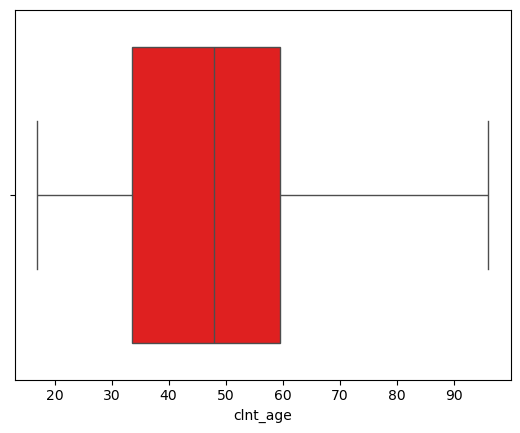

In [156]:
# box
sns.boxplot(x = unique_client_df['clnt_age'], color="Red");
plt.savefig("../figures/Age_boxplot.jpeg", format="jpeg", dpi=300)
plt.show()

#### Box plot for 'clnt_age'
- 1st quartile(0.25) is 33.5 years old
- 2nd quartile(0.50) is 48.0 years old
- 3rd quartile(0.75) is 59.5 years old
- The upper whisker spans over 90 years old.

In [158]:
# Measures of Centrality (balance)
mean_bal = unique_client_df['bal'].mean()
median_bal = unique_client_df['bal'].median()
mode_bal = unique_client_df['bal'].mode()[0]

mean_bal, median_bal, mode_bal

(149521.59216282066, 65736.79999999999, 31188.62)

In [160]:
# Measures of Dispersion (age)
variance_bal = unique_client_df['bal'].var()
std_dev_bal = unique_client_df['bal'].std()
min_bal = unique_client_df['bal'].min()
max_bal = unique_client_df['bal'].max()
range_bal = max_bal - min_bal
quantiles_bal = unique_client_df['clnt_age'].quantile([0.25, 0.5, 0.75])

variance_bal, std_dev_bal, min_bal, max_bal, range_bal, quantiles_bal

(91230609839.11624,
 302044.0528120298,
 23789.44,
 16320040.15,
 16296250.71,
 0.25    33.5
 0.50    48.0
 0.75    59.5
 Name: clnt_age, dtype: float64)

#### Summary Statistics for 'bal'
- The average account balance is 149,521
- Median account balance is 65,736
- Which suggests a right-skewed distribution, most accounts are close to the median but there are outliers with very high balances pull the mean upward.
- Most account balances have less than 65K
- The range between the lowest and highest account balance is very high, 16,296,250.71

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_13999/1735712646.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='balance_category_fixed', data=unique_client_df, palette='Reds', order=balance_labels_fixed)


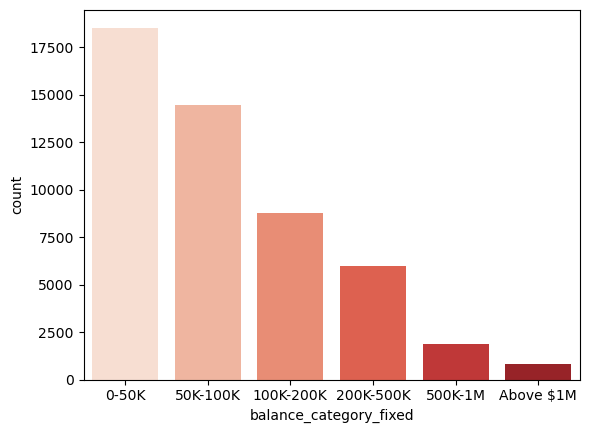

In [162]:
# Discretizing balances using fixed ranges
balance_bins_fixed = [0, 50000, 100000, 200000, 500000, 1000000, df['bal'].max()]
balance_labels_fixed = ['0-50K', '50K-100K', '100K-200K', '200K-500K', '500K-1M', 'Above $1M']
unique_client_df['balance_category_fixed'] = pd.cut(unique_client_df['bal'], bins=balance_bins_fixed, labels=balance_labels_fixed, right=False)

# Visualizing the distribution of balance categories with fixed ranges
sns.countplot(x='balance_category_fixed', data=unique_client_df, palette='Reds', order=balance_labels_fixed)
plt.show()


In [164]:
# Count the occurrences of each balance category
balance_counts = unique_client_df['balance_category_fixed'].value_counts(sort=False)

# Calculate percentages
balance_percentages = (balance_counts / len(unique_client_df)) * 100

# Combine counts and percentages into a DataFrame for better visualization
balance_distribution = pd.DataFrame({
    'Balance Category': balance_labels_fixed,
    'Count': balance_counts.values,
    'Percentage': balance_percentages.values
})

# Display the DataFrame
balance_distribution

,Balance Category,Count,Percentage
0,0-50K,18542,36.727741
1,50K-100K,14464,28.650094
2,100K-200K,8783,17.397247
3,200K-500K,5981,11.847083
4,500K-1M,1887,3.737744
5,Above $1M,827,1.638110


/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_13999/3894658835.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


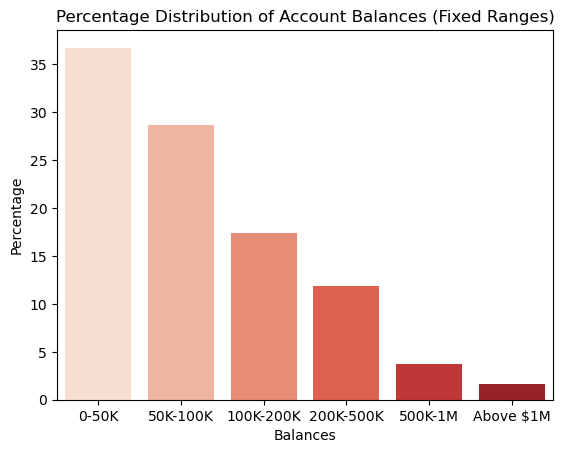

In [166]:
# Bar plot for percentages
sns.barplot(
    x=balance_distribution['Balance Category'], 
    y=balance_distribution['Percentage'], 
    palette='Reds'
)
plt.title('Percentage Distribution of Account Balances (Fixed Ranges)')
plt.xlabel('Balances')
plt.ylabel('Percentage')
plt.savefig("../figures/percentage_distribution_balance.jpeg", format="jpeg", dpi=300)
plt.show()


#### BarPlot for 'bal'
- over 50% of clients have less than 100K
- less than 2% of clients have above 1M in accounts

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_13999/88569291.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Variation', data=unique_client_df, palette='Reds', order=unique_client_df['Variation'].value_counts().index)


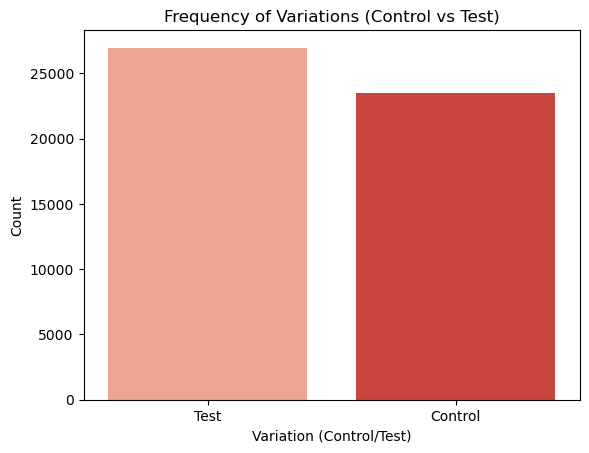

In [178]:
# Variation Frequency (Bar Plot)
sns.countplot(x='Variation', data=unique_client_df, palette='Reds', order=unique_client_df['Variation'].value_counts().index)
plt.title('Frequency of Variations (Control vs Test)')
plt.xlabel('Variation (Control/Test)')
plt.ylabel('Count')
plt.show()

In [182]:
# Count occurrences of each variation
variation_counts = unique_client_df['Variation'].value_counts()

# Calculate percentages
variation_percentages = (variation_counts / len(unique_client_df)) * 100

# Combine into a DataFrame for better visualization
variation_distribution = pd.DataFrame({
    'Variation': variation_counts.index,
    'Count': variation_counts.values,
    'Percentage': variation_percentages.values
})

# Display the DataFrame
variation_distribution

,Variation,Count,Percentage
0,Test,26959,53.40002
1,Control,23526,46.59998


### Frequencies for variation
- There is an uneven split of control and test participants in this test

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_13999/299397690.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


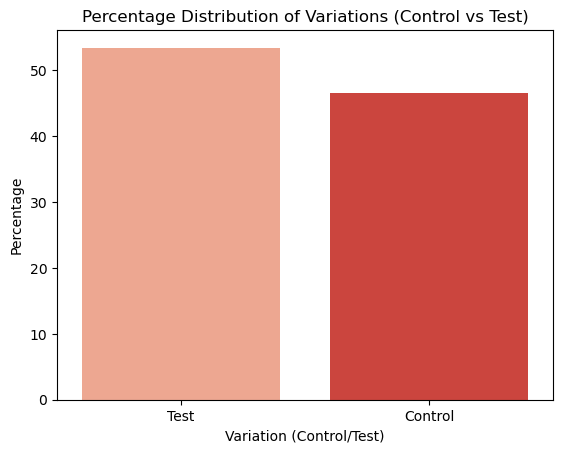

In [184]:
# Bar plot for percentages
sns.barplot(
    x=variation_distribution['Variation'], 
    y=variation_distribution['Percentage'], 
    palette='Reds'
)
plt.title('Percentage Distribution of Variations (Control vs Test)')
plt.xlabel('Variation (Control/Test)')
plt.ylabel('Percentage')
plt.savefig("../figures/variation_percentage_distribution.jpeg", format="jpeg", dpi=300)
plt.show()

In [190]:
# Calculate skewness and kurtosis for numerical columns 'clnt_age' and 'bal'
age_skewness = skew(unique_client_df['clnt_age'])
age_kurtosis = kurtosis(unique_client_df['clnt_age'])

balance_skewness = skew(unique_client_df['bal'])
balance_kurtosis = kurtosis(unique_client_df['bal'])

# For categorical columns like 'process_step' and 'Variation', calculate frequency-based skewness/kurtosis
process_step_counts = unique_client_df['process_step'].value_counts()
variation_counts = unique_client_df['Variation'].value_counts()

process_step_skewness = skew(process_step_counts)
process_step_kurtosis = kurtosis(process_step_counts)

variation_skewness = skew(variation_counts)
variation_kurtosis = kurtosis(variation_counts)

# Creating a dictionary to summarize results
skew_kurtosis_results = {
    'Age': {'Skewness': age_skewness, 'Kurtosis': age_kurtosis},
    'Balance': {'Skewness': balance_skewness, 'Kurtosis': balance_kurtosis},
    'Process Step': {'Skewness': process_step_skewness, 'Kurtosis': process_step_kurtosis},
    'Variation': {'Skewness': variation_skewness, 'Kurtosis': variation_kurtosis},
}

skew_kurtosis_results


{'Age': {'Skewness': 0.07961151837760695, 'Kurtosis': -0.9469682221320257},
 'Balance': {'Skewness': 11.473572927049844, 'Kurtosis': 294.0745182483827},
 'Process Step': {'Skewness': 1.022546713697333,
  'Kurtosis': -0.547379936630465},
 'Variation': {'Skewness': 0.0, 'Kurtosis': -2.0}}

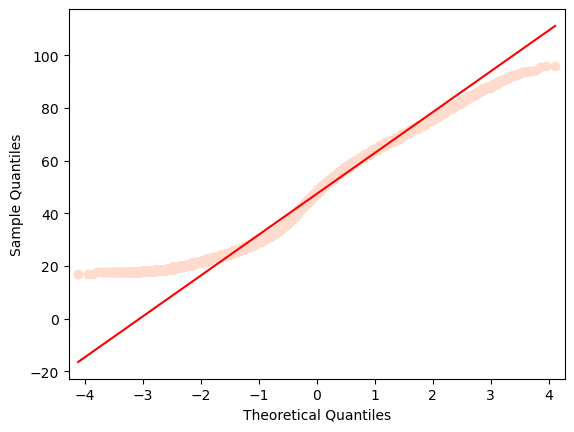

In [188]:
# Generating a Q-Q plot for 'clnt_age' to check if its distribution follows a normal distribution
sm.qqplot(unique_client_df['clnt_age'], line='s');
plt.savefig("../figures/age_qq.jpeg", format="jpeg", dpi=300)
plt.show()

In [217]:
# Ensure datetime is in the correct format for sorting
unique_client_df['date_time'] = pd.to_datetime(unique_client_df['date_time'])

# Sort by client_id and date_time to keep the latest entry
unique_client_df = unique_client_df.sort_values(by=['client_id', 'date_time'])

# Keep only the last 'confirm' step per client
latest_confirm_client = unique_client_df[unique_client_df['process_step'] == 'confirm']
latest_confirm_client = latest_confirm_client.groupby('client_id').tail(1)

# Then, ensure only one 'confirm' step per visit
latest_confirm_visit = latest_confirm_client.iloc[::-1].drop_duplicates(subset=['visit_id', 'process_step'], keep='first').iloc[::-1]


# Combine this filtered data with the rest of the steps
filtered_client_df = pd.concat([unique_client_df[unique_client_df['process_step'] != 'confirm'], latest_confirm_df])

In [219]:
# Define the desired order for process steps
step_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']

# Ensure the column 'process_step' follows this order
filtered_client_df['process_step'] = pd.Categorical(filtered_client_df['process_step'], categories=step_order, ordered=True)

/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_13999/1524574089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


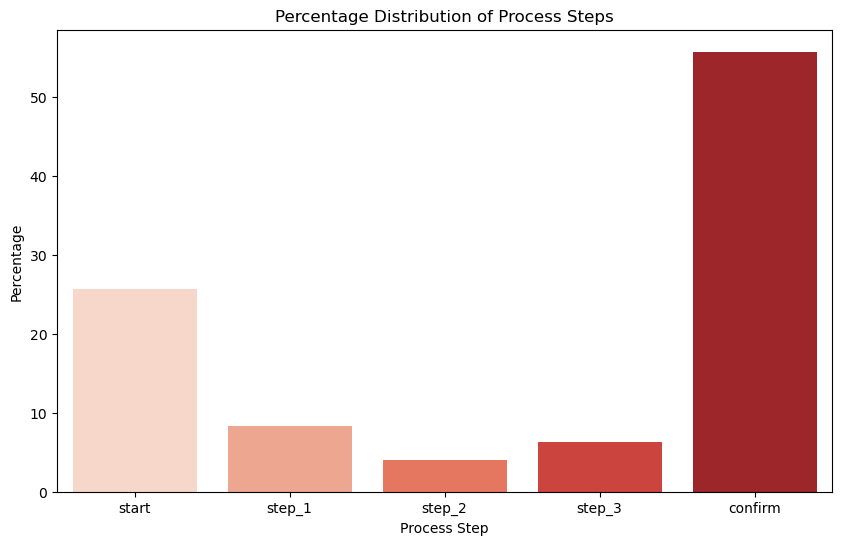

In [196]:
# Bar plot for process step percentages
plt.figure(figsize=(10, 6))
sns.barplot(
    x=process_step_distribution['Process Step'], 
    y=process_step_distribution['Percentage'], 
    order=step_order,  # Ensure the correct order
    palette='Reds'
)
plt.title('Percentage Distribution of Process Steps')
plt.xlabel('Process Step')
plt.ylabel('Percentage')
plt.savefig("../figures/process_step_percentage_distribution.jpeg", format="jpeg", dpi=300)
plt.show()

In [221]:
#Count occurrences of each process step
process_step_counts = filtered_client_df['process_step'].value_counts().reindex(step_order)

# Calculate percentages
process_step_percentages = (process_step_counts / len(filtered_client_df)) * 100

# Combine counts and percentages into a DataFrame
process_step_distribution = pd.DataFrame({
    'Process Step': step_order,
    'Count': process_step_counts.values,
    'Percentage': process_step_percentages.values
})

# Display the DataFrame
process_step_distribution

,Process Step,Count,Percentage
0,start,12953,25.657126
1,step_1,4206,8.331187
2,step_2,2049,4.058631
3,step_3,3148,6.235515
4,confirm,28129,55.717540


/var/folders/hh/hx7f_d913pbf5gbc452qrps00000gp/T/ipykernel_13999/1938405914.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='process_step', data=filtered_client_df, order=step_order, palette='Reds')


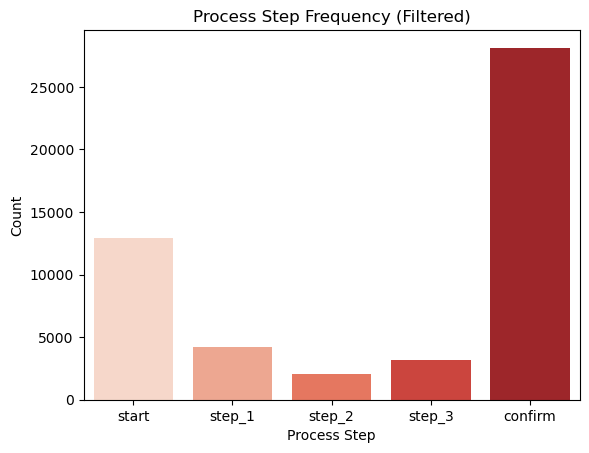

In [223]:
# Process Step Frequency (Bar Plot)
sns.countplot(x='process_step', data=filtered_client_df, order=step_order, palette='Reds')
plt.title('Process Step Frequency (Filtered)')
plt.xlabel('Process Step')
plt.ylabel('Count')
plt.show()

#### Frequencies for 'process_step'
- there is a drop-off pattern, only 13.45% of users who started the process, reached the confirm step.
- The biggest drop-off happens between "start" and "step 1", where nearly 21.1% of users abandon the process.